In [171]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [158]:
X_orig = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')

X_specaug1 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask1.npy')
X_tsh1 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift1.npy')
X_randn1 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise1.npy')
X_tstr1 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch1.npy')

X_specaug2 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask2.npy')
X_tsh2 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift2.npy')
X_randn2 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise2.npy')
X_tstr2 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch2.npy')

X_specaug3 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask3.npy')
X_tsh3 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift3.npy')
X_randn3 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise3.npy')
X_tstr3 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch3.npy')

print(X_orig.shape)

(440, 128, 67)


In [159]:
#choose what to add to the orignal data
X = np.concatenate((X_orig,X_specaug1,X_specaug2), axis=0)
print(X.shape)

df = pd.read_csv("../../data/processed_data/metadata.csv")
category_to_number = {'brushing': 0, 'food': 1, 'isolation': 2}

# Create a new column with numerical values based on the mapping
df['numerical_situation'] = df['situation'].map(category_to_number)

y_orig = df['numerical_situation'].values
y = np.concatenate((y_orig, y_orig, y_orig), axis=0)
print(y.shape)

(1320, 128, 67)
(1320,)


In [160]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(1320, 128, 67, 1)


In [161]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [163]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.6571 - accuracy: 0.2784 - val_loss: 20.3315 - val_accuracy: 0.5114
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 20.6991 - accuracy: 0.4943 - val_loss: 17.6124 - val_accuracy: 0.2188
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 17.1066 - accuracy: 0.2273 - val_loss: 3.1150 - val_accuracy: 0.2188
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 2.9500 - accuracy: 0.2273 - val_loss: 3.0246 - val_accuracy: 0.2699
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 3.0452 - accuracy: 0.2784 - val_loss: 3.0816 - val_accuracy: 0.5114
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 3.1671 - accuracy: 0.4943 - val_loss: 2.4067 - val_accuracy: 0.5114
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.4765 - accuracy: 0.4943 - val_loss: 1.7603 - val_accuracy: 0.5114
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.3420 - accuracy: 0.8793 - val_loss: 0.4974 - val_accuracy: 0.8153
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.3300 - accuracy: 0.8793 - val_loss: 0.4824 - val_accuracy: 0.8182
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.3139 - accuracy: 0.8977 - val_loss: 0.4764 - val_accuracy: 0.8267
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.3029 - accuracy: 0.9006 - val_loss: 0.4710 - val_accuracy: 0.8352
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.2891 - accuracy: 0.9034 - val_loss: 0.4715 - val_accuracy: 0.8324
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.2768 - accuracy: 0.9105 - val_loss: 0.4676 - val_accuracy: 0.8239
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.2640 - accuracy: 0.9148 - val_loss: 0.4634 - val_accuracy: 0.8239
Epoch 67/100
1/1 [=========

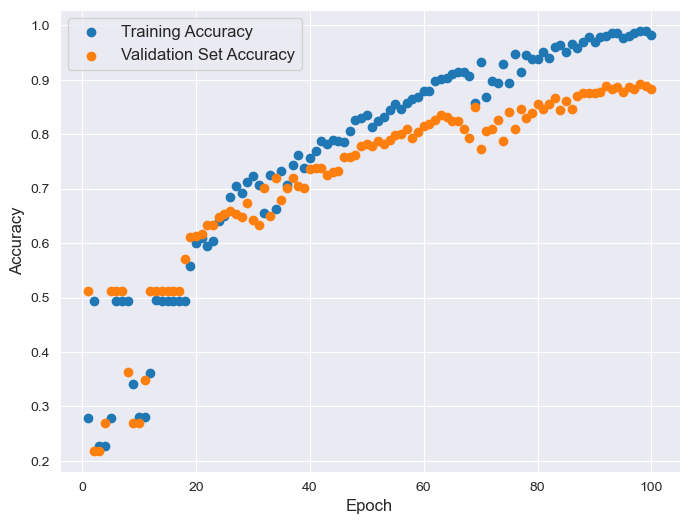

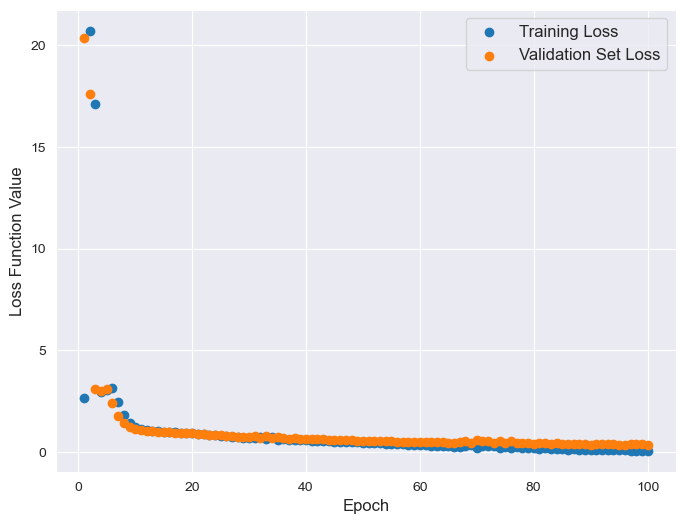

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.5689 - accuracy: 0.4929 - val_loss: 52.5449 - val_accuracy: 0.2727
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 53.1777 - accuracy: 0.2770 - val_loss: 11.3302 - val_accuracy: 0.2727
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 11.6887 - accuracy: 0.2770 - val_loss: 5.4356 - val_accuracy: 0.2386
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 5.6283 - accuracy: 0.2173 - val_loss: 1.6853 - val_accuracy: 0.2386
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.7079 - accuracy: 0.2188 - val_loss: 1.1692 - val_accuracy: 0.4886
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.1465 - accuracy: 0.5057 - val_loss: 1.1546 - val_accuracy: 0.4886
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.1201 - accuracy: 0.5057 - val_loss: 1.0311 - val_accuracy: 0.4886
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.4064 - accuracy: 0.8409 - val_loss: 0.5942 - val_accuracy: 0.7500
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.3995 - accuracy: 0.8381 - val_loss: 0.5816 - val_accuracy: 0.7528
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.3934 - accuracy: 0.8509 - val_loss: 0.5871 - val_accuracy: 0.7585
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.3869 - accuracy: 0.8466 - val_loss: 0.5730 - val_accuracy: 0.7699
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.3775 - accuracy: 0.8551 - val_loss: 0.5708 - val_accuracy: 0.7670
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.3691 - accuracy: 0.8594 - val_loss: 0.5737 - val_accuracy: 0.7614
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.3640 - accuracy: 0.8551 - val_loss: 0.5649 - val_accuracy: 0.7670
Epoch 67/100
1/1 [=========

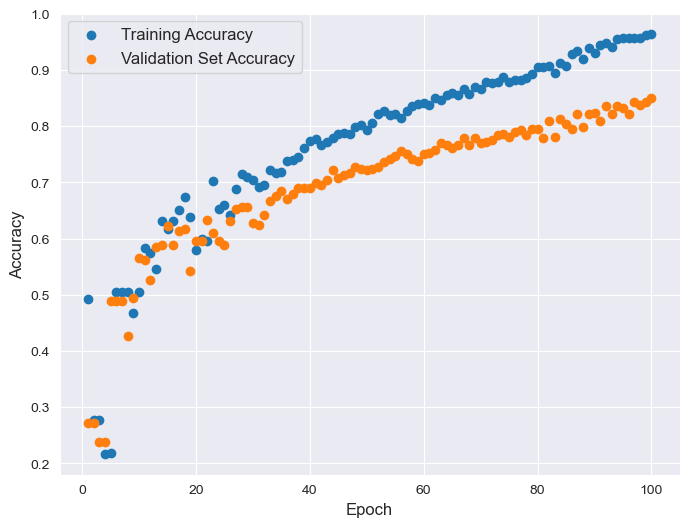

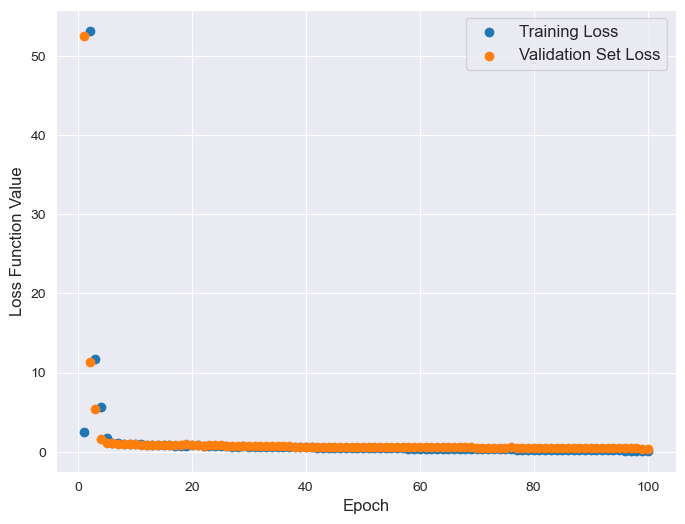

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 8.0496 - accuracy: 0.2713 - val_loss: 26.0139 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 25.9157 - accuracy: 0.5000 - val_loss: 8.4992 - val_accuracy: 0.2159
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 8.3917 - accuracy: 0.2287 - val_loss: 2.8679 - val_accuracy: 0.2273
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 2.8522 - accuracy: 0.2315 - val_loss: 1.0674 - val_accuracy: 0.5057
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.0885 - accuracy: 0.5256 - val_loss: 1.8587 - val_accuracy: 0.2869
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.9259 - accuracy: 0.2727 - val_loss: 1.3832 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.4181 - accuracy: 0.5000 - val_loss: 1.4031 - val_accuracy: 0.5000
Epoch 8/100
1/1 [===============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.2994 - accuracy: 0.8878 - val_loss: 0.3600 - val_accuracy: 0.8466
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.2842 - accuracy: 0.8892 - val_loss: 0.3484 - val_accuracy: 0.8466
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.2748 - accuracy: 0.8963 - val_loss: 0.3414 - val_accuracy: 0.8438
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.2639 - accuracy: 0.9062 - val_loss: 0.3427 - val_accuracy: 0.8381
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.2508 - accuracy: 0.9077 - val_loss: 0.3491 - val_accuracy: 0.8438
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.2426 - accuracy: 0.9148 - val_loss: 0.3470 - val_accuracy: 0.8551
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.2329 - accuracy: 0.9219 - val_loss: 0.3331 - val_accuracy: 0.8665
Epoch 67/100
1/1 [=========

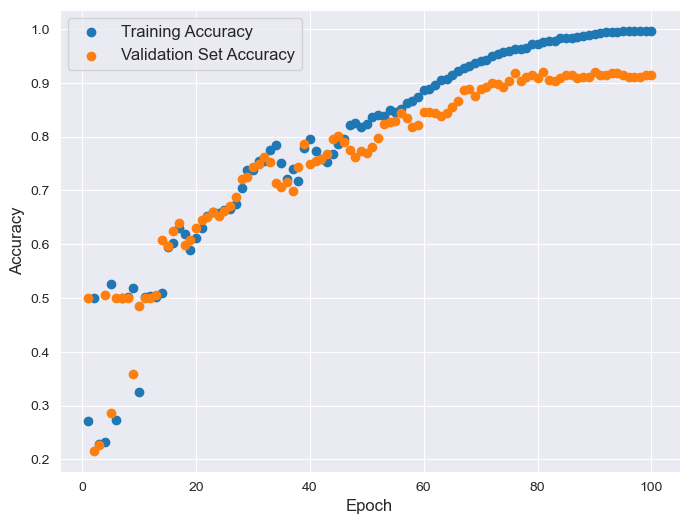

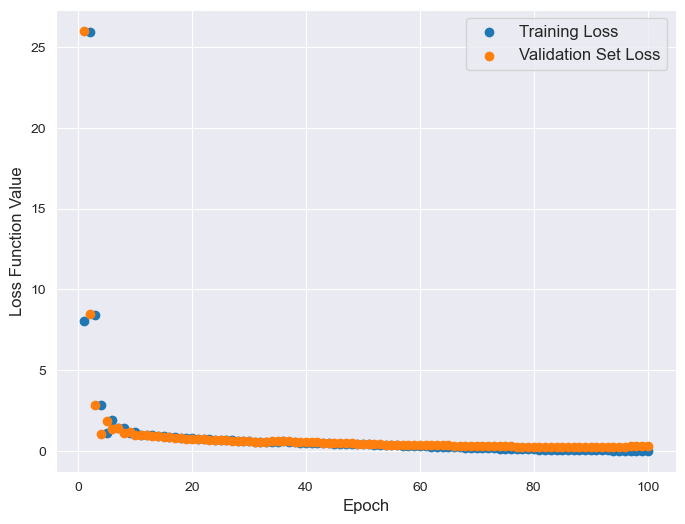

In [164]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=100

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(64, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    model.add( layers.Conv2D(96, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(45, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=int(len(y_tt)),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)

In [165]:
epochs = 90 ##earlier stop, observed from Cross validation

model = models.Sequential()
model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(64, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
model.add( layers.Conv2D(96, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
model.add( layers.Flatten() )
model.add(layers.Dense(45, activation='relu'))

## Finally an output layer
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=len(y_train)
                    )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/90
1/1 [==============================] - 5s 5s/step - loss: 7.5616 - accuracy: 0.5019
Epoch 2/90
1/1 [==============================] - 4s 4s/step - loss: 22.4886 - accuracy: 0.2093
Epoch 3/90
1/1 [==============================] - 4s 4s/step - loss: 6.5216 - accuracy: 0.2888
Epoch 4/90
1/1 [==============================] - 4s 4s/step - loss: 12.0146 - accuracy: 0.5019
Epoch 5/90
1/1 [==============================] - 4s 4s/step - loss: 7.8209 - accuracy: 0.5019
Epoch 6/90
1/1 [==============================] - 4s 4s/step - loss: 2.8966 - accuracy: 0.5019
Epoch 7/90
1/1 [==============================] - 4s 4s/step - loss: 1.0292 - accuracy: 0.4773
Epoch 8/90
1/1 [==============================] - 4s 4s/step - loss: 1.6668 - accuracy: 0.2888
Epoch 9/90
1/1 [==============================] - 4s 4s/step - loss: 1.4849 - accuracy: 0.2888
Epoch 10/90
1/1 [==============================] - 4s 4s/step - loss: 1.2773 - accuracy: 0.2320
Epoch 11/90
1/1 [==============================

1/1 [==============================] - 4s 4s/step - loss: 0.0926 - accuracy: 0.9820
Epoch 87/90
1/1 [==============================] - 4s 4s/step - loss: 0.0853 - accuracy: 0.9811
Epoch 88/90
1/1 [==============================] - 4s 4s/step - loss: 0.0821 - accuracy: 0.9830
Epoch 89/90
1/1 [==============================] - 4s 4s/step - loss: 0.0773 - accuracy: 0.9848
Epoch 90/90
1/1 [==============================] - 4s 4s/step - loss: 0.0734 - accuracy: 0.9848


In [166]:
model.evaluate(X_test,to_categorical(y_test)) ##If want to use this predict new data, use model.predict() after loading the model



9/9 [==============================] - 0s 26ms/step - loss: 0.2382 - accuracy: 0.9015


[0.23815350234508514, 0.9015151262283325]

In [167]:
predictions = model.predict(X_test)

9/9 [==============================] - 0s 26ms/step


In [168]:
predicted_categ = np.argmax(predictions, axis=1)

# 'predicted_labels' now contains the predicted class indices for each sample
print(predicted_categ)

[2 0 1 2 2 0 0 0 0 2 2 2 2 0 2 1 0 0 2 2 2 2 2 0 0 2 1 2 0 0 1 2 0 2 2 0 2
 2 2 2 1 1 1 0 1 2 0 2 0 0 2 2 1 2 2 1 2 0 0 0 2 2 0 0 1 1 2 2 2 0 0 0 2 1
 2 1 1 2 0 2 0 1 2 2 1 2 2 2 2 1 2 2 0 2 2 1 2 2 2 2 1 0 2 2 1 2 2 2 2 2 2
 2 0 2 1 0 1 2 2 0 0 1 2 2 0 1 1 2 0 1 0 2 0 2 0 2 2 0 2 2 0 0 0 0 2 0 0 2
 0 1 0 1 2 0 2 1 1 2 1 1 1 1 2 2 0 0 2 1 2 0 2 0 2 2 0 1 1 2 2 2 2 2 2 1 0
 0 0 1 1 2 2 0 2 2 2 0 2 2 1 0 2 0 2 2 1 1 2 2 0 1 0 2 2 2 2 0 1 2 1 1 2 2
 0 0 1 2 0 2 0 2 2 2 2 2 1 2 2 2 1 1 0 1 0 2 1 0 0 1 2 0 2 0 1 2 2 0 2 1 2
 0 2 1 1 1]


In [169]:
predicted_categ-y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0, -1, -2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [170]:
model.save("/Users/jinjingyi/meow/meow-by-meow/data/trained_models/CNN/CNN_dataaug_with_2freqtime_masking.keras")